# Confidence Intervals with T-Distribution

## Introduction

We've started to take a look at confidence intervals, but our example doesn't match what typically happens in practice. That is, when we previously calculated confidence intervals, we assumed we knew the population standard deviation. This is extremely rare, after all, when do you know the population standard deviation but not the population mean? To solve this problem, we use what's known as a t-distribution. T-distributions are similar to the normal distribution in shape but have heavier tails. T-distributions also have a parameter known as **degrees of freedom**. The higher the degrees of freedom, the closer the distribution resembles that of the normal distribution. Here the normal distribution is pictured in blue with the current t-distribution in red and previous t-distributions (with lower degrees of freedom) in green.

<img src="images/new_tdist_df.png">

## Objectives
You will be able to:

* Calculate confidence intervals
* Interpret confidence intervals in relation to true population parameters

## Let's get started!

As stated above, we are often trying to infer population parameters from a sample. As such, we typically don't know the population variance or standard deviation. To start, it is thus natural to use the standard deviation of our sample as an estimate for the standard deviation of our population.

$S=\sqrt{\dfrac{1}{n-1}\sum\limits_{i=1}^n (X_i-\bar{X})^2}$

So, when we go to find our confidence interval as before, our equation,

$\dfrac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$

will become 

$\dfrac{\bar{X}-\mu}{S/\sqrt{n}}$

(substituting S, the sample standard deviation, in for $\sigma$)

As a result, our question now becomes how is this quantity distributed?

$T=\dfrac{\bar{X}-\mu}{S/\sqrt{n}}$

While outside the scope of this discussion, it can be shown that this quantity can be modeled by a t-distribution. (Hence the use of the letter $T$).

With this, you can calculate confidence intervals for the population mean with your sample alone by using the equation:  

$\bar{x}\pm t_{\alpha/2,n-1}\left(\dfrac{S}{\sqrt{n}}\right)$


To review some vocabulary and terms:

(1) $\bar{x}$  is a "point estimate" of μ

(2)  $\bar{x}\pm t_{\alpha/2,n-1}\left(\dfrac{S}{\sqrt{n}}\right)$ is an "interval estimate" of μ

(3) $\dfrac{S}{\sqrt{n}}$ is the "standard error of the mean"

(4) $t_{\alpha/2,n-1}\left(\dfrac{S}{\sqrt{n}}\right)$ is the "margin of error"

Let's try this out in practice.

First, we start with a sample of patient cholesterol levels that we'll use to calculate the population mean with a 95% confidence.

In [3]:
import numpy as np

In [4]:
sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,
                      69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]

From our sample, we then calculate our sample mean ($\bar{x}$) and our sample standard deviation ($S$). 

We pass the parameter `ddof = 1` to `np.std` to make sure we correctly compute the standard deviation of the sample.

In [5]:
x_bar = np.mean(sample_chol_levels)
s = np.std(sample_chol_levels, ddof = 1)
print(x_bar, s)

62.45 19.209304214912432


We then calculate our interval estimate using a t-distribution and our various parameters. The t-distribution requires 4 parameters: 
* The sample mean
* The sample standard deviation
* The degrees of freedom (this is 1 less then the number of items in the sample)
* The confidence level we wish to have in our estimate

In [6]:
import scipy.stats as stats

In [7]:
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(sample_chol_levels)-1,             # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = s)                                 # Standard deviation estimate

(22.244464209742247, 102.65553579025776)

Note that this confidence interval is particularly wide! In order to achieve a 95% confidence level, we had to make a very general statement that we believe the average cholesterol level is between 22 and 102.

As a preview of running further simulations to investigate some of these relationships, here is a similar dataset, generated at random, and the associated statistical techniques used to estimate the population mean. Note that with the large sample size, the sample point estimates are fairly accurate on their own. Despite this, the confidence interval is still quite large for the population mean. In part, this is due to a large standard deviation.

Note we pass the parameter `ddof = 1` to `np.std` to make sure we correctly compute the standard deviation of the sample.

In [8]:
sample_chol_levels = np.random.normal(loc=54, scale=17, size=1000)

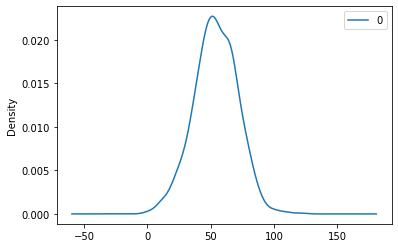

In [18]:
import pandas as pd
pd.DataFrame(sample_chol_levels).plot(kind='density')

In [12]:
x_bar = np.mean(sample_chol_levels)
s = np.std(sample_chol_levels, ddof = 1)
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)

Sample mean: 53.867707867798835
Sample standard deviation: 17.187123088539522


In [13]:
#Min and Max of Confidence Interval
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(sample_chol_levels)-1,             # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = s)    

(20.140703633553755, 87.59471210204391)

## Additional Resources

https://onlinecourses.science.psu.edu/stat414/node/199/  

## Summary

In this lecture, we investigated the more common method for calculating confidence intervals, as we will rarely know the population's standard deviation. As a result, we use the t-distribution, allowing us to find estimates for the population mean even when not knowing any specific parameters concerning the population.